<a href="https://colab.research.google.com/github/JEETMANISHBOBDE/Bitcoin-Price-Prediction-using-Machine-Learning/blob/main/Bitcoin_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching Bitcoin data...


[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Ticker                        BTC-USD     BTC-USD     BTC-USD     BTC-USD   
Date                                                                        
2015-01-01 00:00:00+00:00  314.248993  314.248993  320.434998  314.002991   
2015-01-02 00:00:00+00:00  315.032013  315.032013  315.838989  313.565002   
2015-01-03 00:00:00+00:00  281.082001  281.082001  315.149994  281.082001   
2015-01-04 00:00:00+00:00  264.195007  264.195007  287.230011  257.612000   
2015-01-05 00:00:00+00:00  274.473999  274.473999  278.341003  265.084015   

Price                            Open    Volume                      Date  
Ticker                        BTC-USD   BTC-USD                            
Date                                                                       
2015-01-01 00:00:00+00:00  320.434998   8036550 2015-01-01 00:00:00+00:00  
2015-01-02 00:00:00+00:00  314.079010   7860650 2015-01-02 00:00:00+00:00  
201

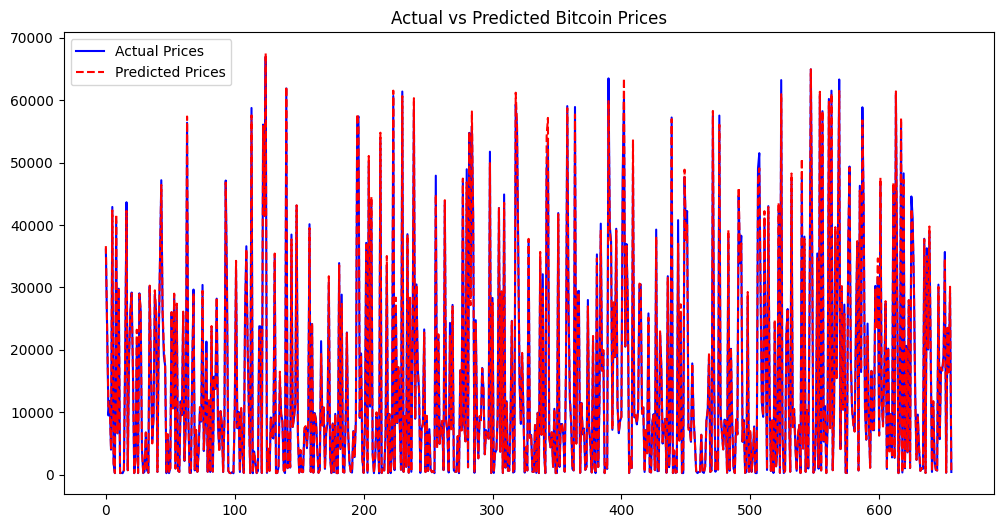

The predicted price for the next day is: $42083.07


In [1]:
# Install necessary libraries
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load Bitcoin historical data
print("Fetching Bitcoin data...")
btc_data = yf.download("BTC-USD", start="2015-01-01", end="2023-12-31")
btc_data['Date'] = btc_data.index

# Display data
print(btc_data.head())

# Feature engineering: use 'Close' price as the feature
btc_data['Target'] = btc_data['Close'].shift(-1)  # Predict the next day's close price
btc_data = btc_data.dropna()

# Select features and target
X = btc_data[['Close']]
y = btc_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle='dashed')
plt.title("Actual vs Predicted Bitcoin Prices")
plt.legend()
plt.show()

# Predict the next day's price
latest_price = btc_data[['Close']].iloc[-1].values.reshape(1, -1)  # Reshape to a 2D array
next_day_price = model.predict(latest_price)
print(f"The predicted price for the next day is: ${next_day_price[0]:.2f}")